<a href="https://colab.research.google.com/github/c-quilo/ROMS-tutorial/blob/main/MNIST_AE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MNIST with a fully-connected autoencoder: example
Thursday 4th March 2021

In [1]:
import tensorflow.keras as tf
from keras.datasets.mnist import load_data
import matplotlib.pyplot as plt
!pip install eofs
import eofs
from eofs.standard import Eof
import numpy as np

     |████████████████████████████████| 1.0 MB 4.6 MB/s 
  Created wheel for eofs: filename=eofs-1.4.0-py3-none-any.whl size=1100374 sha256=6f36ecfbeeffb8455ece2372aac0464fc2a99ec984b1a4c5349b74b06ea09589
  Stored in directory: /root/.cache/pip/wheels/ce/4e/36/2ef48d7342cd326d5f3bdb4ddd0441f06b387b5cbfc8336095
Successfully built eofs


In [2]:
#Load data
(Xtrain, _), (Xtest, _) = load_data()
# summarize the shape of the dataset
print('Train', Xtrain.shape, )
print('Test', Xtest.shape, )

11501568/11490434 [==============================] - 0s 0us/step
Train (60000, 28, 28)
Test (10000, 28, 28)


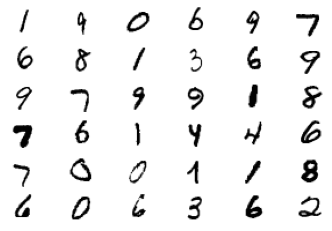

In [3]:
for i in range(36):
  plt.subplot(6,6,i+1)
  plt.imshow(Xtrain[np.random.randint(Xtrain.shape[0])], cmap='gray_r')
  plt.axis('off')

In [4]:
#Gather model data
Xtrain = Xtrain.reshape((len(Xtrain), np.prod(Xtrain.shape[1:])))
Xtest = Xtest.reshape((len(Xtest), np.prod(Xtest.shape[1:])))
print(Xtrain.shape)
print(Xtest.shape)

(60000, 784)
(10000, 784)


In [7]:
#Scale data between 0 and 1
Xtrain = Xtrain/255.0
Xtest = Xtest/255.0
nSnapshots = Xtrain.shape[0]
nFeatures = Xtrain.shape[1]

In [14]:
#Define model
input_enc = tf.Input(shape=(nFeatures))
enc = tf.layers.Dense(128)(input_enc)
enc_output = tf.layers.Dense(64)(enc)


input_dec = tf.Input(shape=(64))
dec = tf.layers.Dense(128)(input_dec)
dec = tf.layers.Dense(nFeatures, activation='sigmoid')(dec)

#Encoder model
enc_model = tf.Model(input_enc, enc_output)
enc_model.summary()
#Decoder model
dec_model = tf.Model(input_dec, dec)
dec_model.summary()
#ae model
ae_model = tf.Model(input_enc, dec_model(enc_output))

ae_model.compile(loss='binary_crossentropy', optimizer='adam')
Xtrain.shape
#y_train.shape

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
Total params: 108,736
Trainable params: 108,736
Non-trainable params: 0
_________________________________________________________________
Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 64)]              0         
                                                                 
 dense_6 (Dense)             (None, 

(60000, 784)

In [11]:
history = ae_model.fit(Xtrain, Xtrain, epochs=500, batch_size=256, verbose=2, validation_data = (Xtest, Xtest), shuffle = True)

Epoch 1/5
235/235 - 5s - loss: 2.6882e-05 - val_loss: 2.7202e-05 - 5s/epoch - 23ms/step
Epoch 2/5
235/235 - 5s - loss: 2.6860e-05 - val_loss: 2.7181e-05 - 5s/epoch - 21ms/step
Epoch 3/5
235/235 - 3s - loss: 2.6841e-05 - val_loss: 2.7163e-05 - 3s/epoch - 15ms/step
Epoch 4/5
235/235 - 3s - loss: 2.6824e-05 - val_loss: 2.7148e-05 - 3s/epoch - 14ms/step
Epoch 5/5
235/235 - 3s - loss: 2.6810e-05 - val_loss: 2.7135e-05 - 3s/epoch - 15ms/step


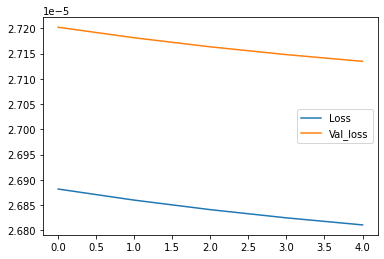

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Loss', 'Val_loss'])

In [13]:
#Reconstruction using AE
#Unscale the data

ae_prediction = ae_model.predict(Xtrain)

ae_prediction = ae_prediction*255.0
ae_prediction.shape

(60000, 784)

[56422 15795   860 38158 54343 44732 11284 54886  6265 16850]


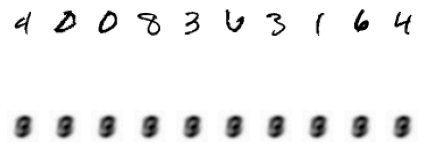

In [15]:
#Reconstruction using AE
#Same random numbers as PCA example
np.random.seed(42)
nDisplay = 10
randomIndex = np.random.randint(0, ae_prediction.shape[0], nDisplay)
print(randomIndex)
for i in range(nDisplay):
  plt.subplot(2, nDisplay, i+1)
  plt.imshow(np.reshape(Xtrain[randomIndex[i]], (28, 28)), cmap = 'gray_r')
  plt.axis('off')
  plt.subplot(2, nDisplay, i+1+nDisplay)
  plt.imshow(np.reshape(ae_prediction[randomIndex[i]], (28, 28)), cmap = 'gray_r')
  plt.axis('off')
plt.tight_layout()